평가지표 : RMSLE

In [13]:
import numpy as np
import pandas as pd

data_path = '../data/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [14]:
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


| 컬럼명 | 설명 |
|-------------|----------------------------------------------------------------------|
| datetime | 일시 |
| season | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울) |
| holiday | 공휴일 여부 (0: 공휴일이 아님, 1: 공휴일) |
| workingday | 근무일 여부 (0: 근무일이 아님, 1: 근무일) |
| weather | 날씨 (1: 맑음, 2: 옅은 안개, 흐림, 3: 약간의 눈, 비, 천둥 번개, 4: 비, 눈) |
| temp | 온도 |
| atemp | 체감온도 |
| humidity | 습도 |
| windspeed | 풍속 |
| casual | 대여 횟수 (비회원) |
| registered | 대여 횟수 (회원) |
| count | 대여 횟수 (회원 + 비회원) |



In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [18]:
all_data = pd.concat([test,train],ignore_index=True)
all_data.shape

(17379, 12)

In [19]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [20]:
import calendar
train['weekday'] = train['datetime'].apply(lambda date:calendar.day_name[date.weekday()])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


In [21]:
train['season'] = train['season'].map({
    1:'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstom',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog'
})

In [22]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

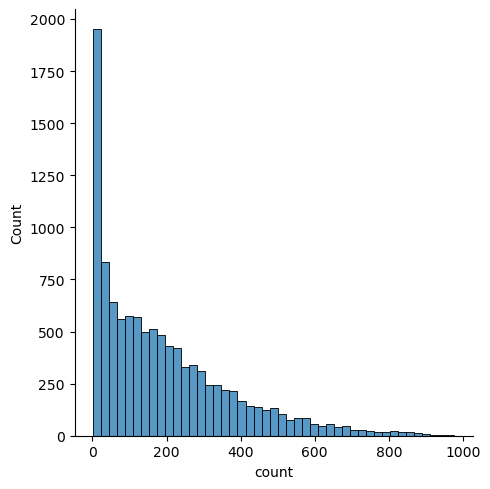

In [23]:
mpl.rc('font',size = 10)
sns.displot(train['count'])

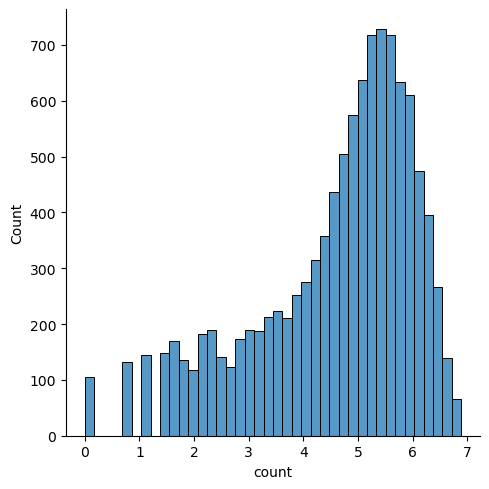

In [24]:
sns.displot(np.log(train['count']))

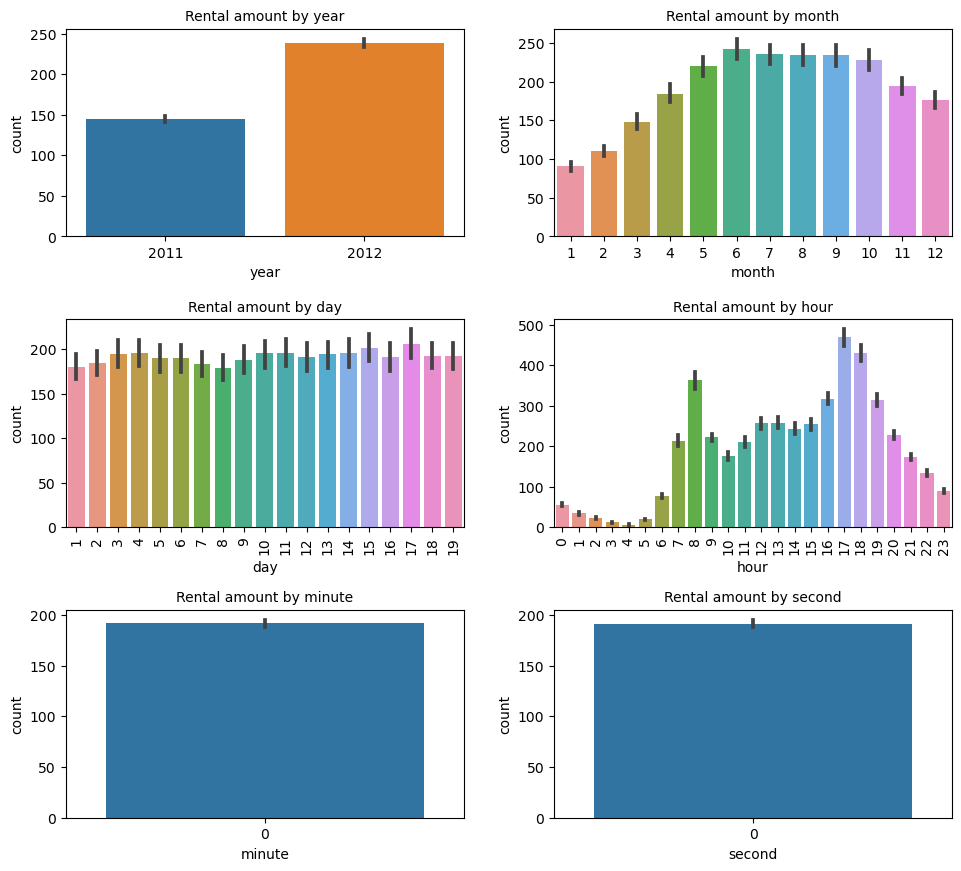

In [38]:
mpl.rc('font',size = 10)
mpl.rc('axes',titlesize = 10)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y= 'count',data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data= train, ax =axes[0,1])
sns.barplot(x='day', y= 'count',data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data= train, ax =axes[1,1])
sns.barplot(x='minute', y= 'count',data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data= train, ax =axes[2,1])

axes[0,0].set(title = 'Rental amount by year')
axes[0,1].set(title = 'Rental amount by month')
axes[1,0].set(title = 'Rental amount by day')
axes[1,1].set(title = 'Rental amount by hour')
axes[2,0].set(title = 'Rental amount by minute')
axes[2,1].set(title = 'Rental amount by second')

axes[1,0].tick_params(axis='x',labelrotation=90)
axes[1,1].tick_params(axis='x',labelrotation=90)